#Read file

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
loan_df=pd.read_csv("/content/loan.csv")
loan_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Data analysis and visualization

In [ ]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_df.shape

(614, 13)

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

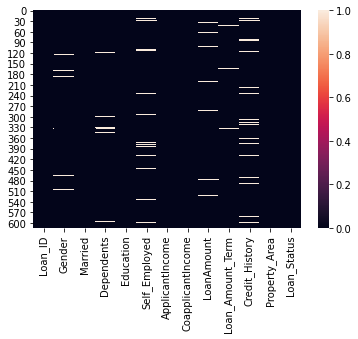

In [ ]:

sns.heatmap(loan_df.isna())

This figure helps to get a visual essence of nan value distribution though out the data. From this figure we can see that most of nan value present in credit_history feature.

In [ ]:
loan_df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

in this dataset, according to parson approval document 68.72% are belong to yes class and 31.27% belongs to no class.

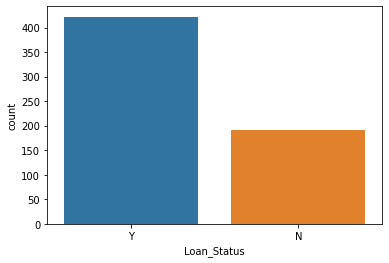

In [ ]:
sns.countplot(x='Loan_Status',data=loan_df)

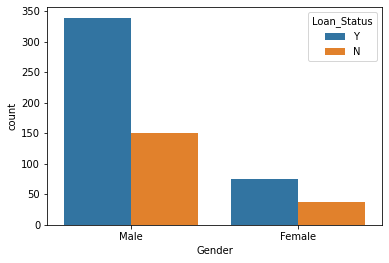

In [ ]:
sns.countplot(x='Gender',data=loan_df,hue="Loan_Status")

most of time loan is taken by male parson than female.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


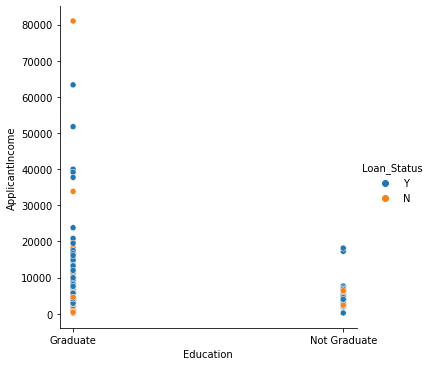

In [ ]:
sns.relplot("Education","ApplicantIncome",data=loan_df,hue="Loan_Status")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


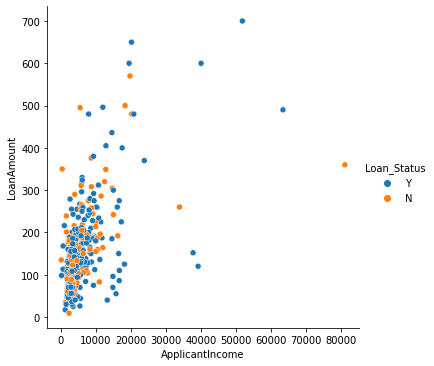

In [ ]:
sns.relplot("ApplicantIncome","LoanAmount",data=loan_df,hue="Loan_Status")

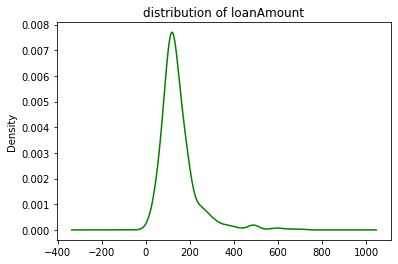

In [ ]:
loan_df.LoanAmount.plot.density(color='green')
plt.title("distribution of loanAmount")
plt.show()

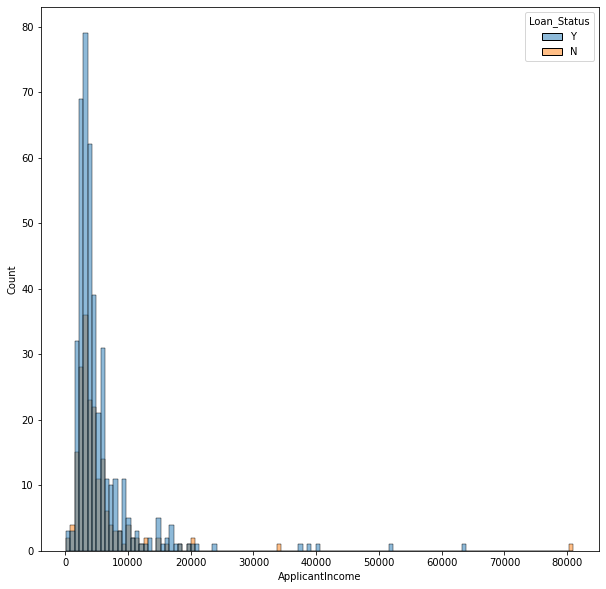

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=loan_df,x="ApplicantIncome",hue="Loan_Status")

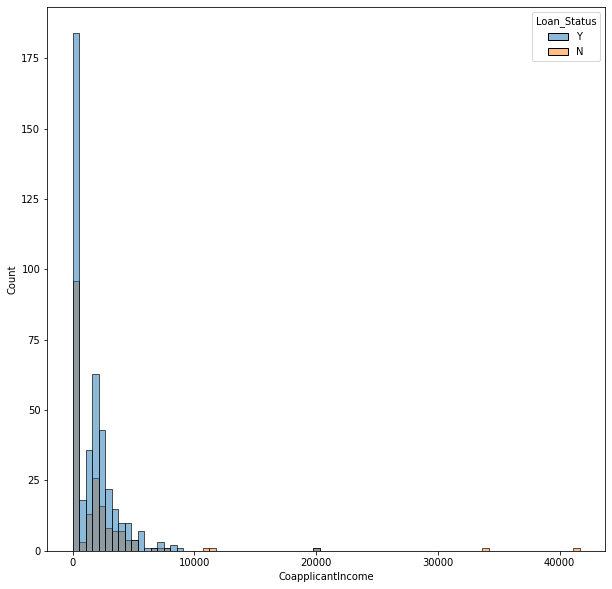

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=loan_df,x="CoapplicantIncome",hue="Loan_Status")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


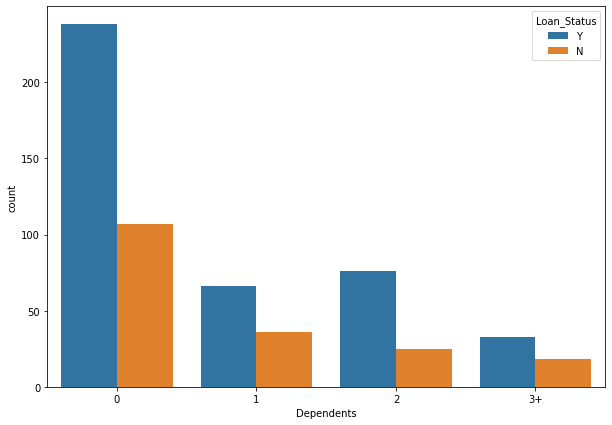

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot('Dependents',data=loan_df,hue='Loan_Status')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


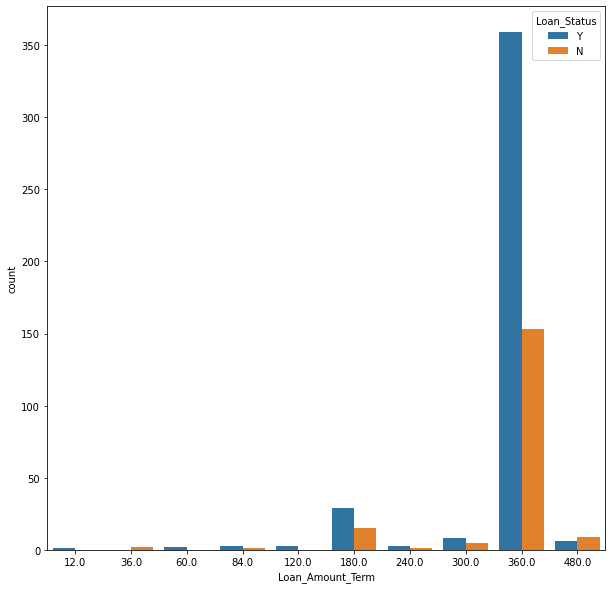

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot('Loan_Amount_Term',data=loan_df,hue='Loan_Status')
plt.xlabel('Loan_Amount_Term')
plt.show()

#Data preprocessing

In [ ]:
for i in loan_df['Loan_ID']:
  #print(i[2:])
  loan_df['Loan_ID']=loan_df['Loan_ID'].replace(i,i[2:])
print(type(loan_df['Loan_ID'][0]))



<class 'str'>


In [ ]:
loan_df['Loan_ID']=loan_df['Loan_ID'].astype(int)

In [ ]:
loan_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
loan_df['Gender']=loan_df.Gender.map({"Male":0,"Female":1})

In [ ]:
loan_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
loan_df['Married']=loan_df.Married.map({"No":0,"Yes":1})

In [ ]:
loan_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
loan_df["Dependents"]=loan_df.Dependents.map({"0":0,"1":1,"2":2,"3+":3})

In [ ]:
loan_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
loan_df["Education"]=loan_df.Education.map({"Not Graduate":0,"Graduate":1})
loan_df['Self_Employed']=loan_df.Self_Employed.map({"No":0,"Yes":1})
loan_df['Property_Area']=loan_df.Property_Area.map({"Urban":0,"Rural":1,"Semiurban":2})
loan_df['Loan_Status']=loan_df.Loan_Status.map({"N":0,"Y":1})

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 62.5 KB


In [ ]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,1003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,1005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,1006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,1008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2978,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,2979,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,2983,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
612,2984,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


In [ ]:
loan_df=loan_df.dropna(axis=0)

In [ ]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    int64  
 1   Gender             480 non-null    float64
 2   Married            480 non-null    float64
 3   Dependents         480 non-null    float64
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    float64
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 52.5 KB


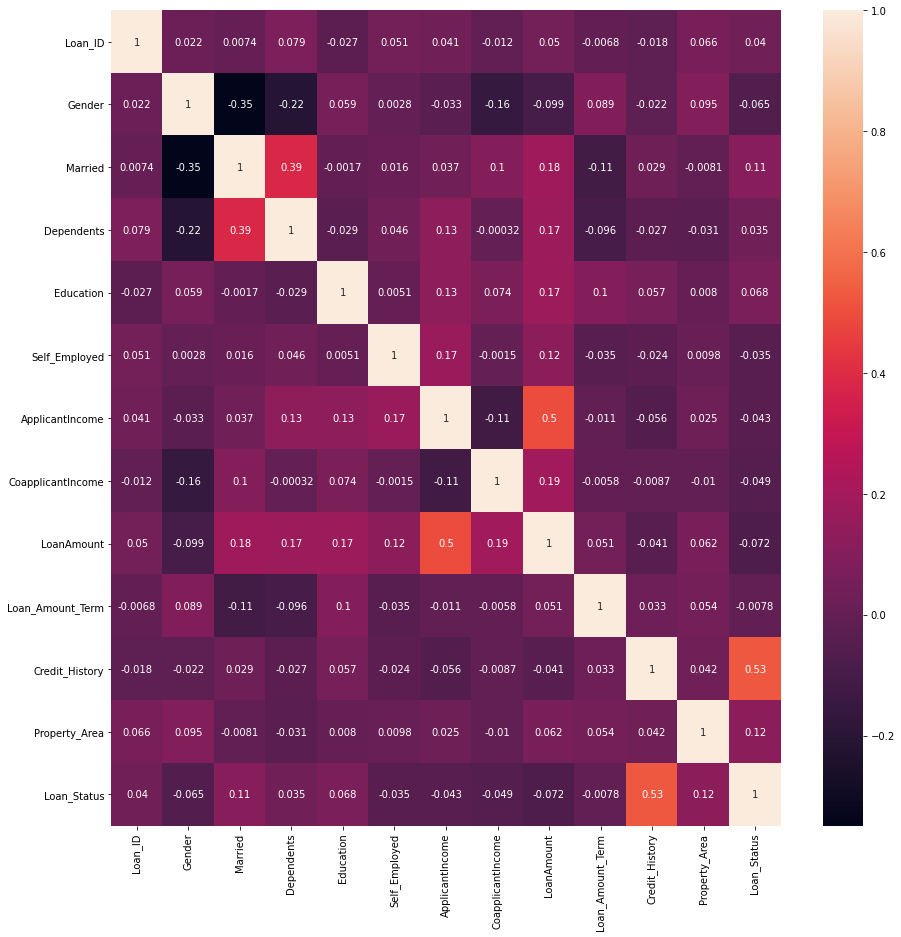

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
_,ax=plt.subplots(figsize=(15,15))
sns.heatmap(loan_df.corr(),annot=True,ax=ax)

In [ ]:
loan_df.drop('Loan_ID',axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Model building

In [ ]:
x=loan_df.drop('Loan_Status',axis=1)
y=loan_df['Loan_Status']
print(x.shape)
print(y.shape)

(480, 11)
(480,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
act = accuracy_score(y_train,y_train_pred)
print('Train Accuracy is: ',(act*100))
y_test_pred=lr.predict(x_test)
act1 = accuracy_score(y_test,y_test_pred)
print('Test Accuracy is: ',(act1*100))

Train Accuracy is:  79.42708333333334
Test Accuracy is:  84.375


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


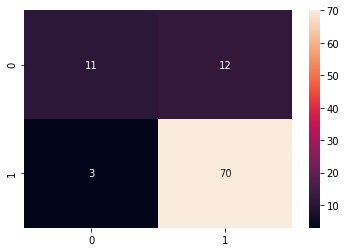

In [ ]:
cn = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cn,annot=True)

In [ ]:
report=classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.48      0.59        23
           1       0.85      0.96      0.90        73

    accuracy                           0.84        96
   macro avg       0.82      0.72      0.75        96
weighted avg       0.84      0.84      0.83        96

